In [1]:
import pandas as pd
df = pd.read_csv("clustering_synthetic_dataset.csv")
df

,f1,f2
0,0.494261,1.451067
1,-1.428081,-0.837064
2,0.338559,1.038759
3,0.119001,-1.053976
4,1.122425,1.774937
...,...,...
745,0.505927,1.213927
746,-1.640461,-0.469973
747,-0.057139,-0.909261
748,-1.169394,0.039597


<AxesSubplot: xlabel='f1', ylabel='f2'>

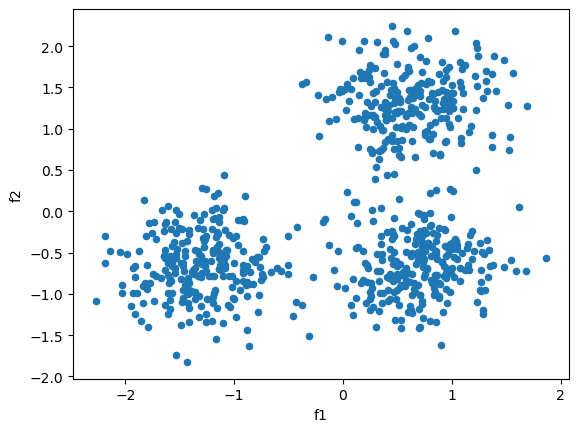

In [6]:
df.plot(x='f1',y='f2',kind='scatter')

In [ ]:
def cluster_separation():
    

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import adjusted_rand_score



km = KMeans(n_clusters=3)
km.fit(df)
(km.cluster_centers_)


array([[-1.30266211, -0.65704205],
       [ 0.62260555,  1.3172598 ],
       [ 0.6954587 , -0.64442334]])

In [32]:
print(km.predict([[1,-1.5],[1,1.5],[2,2],[-2,-1]]))

[2 1 1 0]


C:\Users\phill\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [33]:
def euclidean_distance(x1,x2):
    return ((x1[0]-x2[0])**2+(x1[1]-x2[1])**2)**.5

In [44]:
import math
def cluster_separation(km,num_clusters):
    total = 0
    for i in range(num_clusters):
        for j in range(i+1,num_clusters):
            total+=euclidean_distance(km.cluster_centers_[i],km.cluster_centers_[j])
    return total/math.comb(num_clusters,2)
    

In [46]:
def cluster_cohesion(km,num_clusters,X):
    counts = [0]*num_clusters
    sums = [0]*num_clusters
    centers = km.cluster_centers_
    for i in range(len(X)):
        pred = km.predict([X.iloc[i]])[0]
        counts[pred]+=1
        sums[pred] += euclidean_distance(centers[pred],X.iloc[i])
        
    for i in range(len(sums)):
        sums[i]/=counts[i]
    return max(sums)
    

In [49]:
import warnings
warnings.filterwarnings("ignore")
num_clusters = (2,3,4,5)
for i in num_clusters:
    km = KMeans(n_clusters=i)
    km.fit(df)
    print(f"For {i:d} clusters, the cluster separation "
          f"is {cluster_separation(km,i):.3f} and the max cluster cohesion is {cluster_cohesion(km,i,df):.3f}")
    

For 2 clusters, the cluster separation is 2.182 and the max cluster cohesion is 1.048
For 3 clusters, the cluster separation is 2.240 and the max cluster cohesion is 0.478
For 4 clusters, the cluster separation is 1.903 and the max cluster cohesion is 0.476
For 5 clusters, the cluster separation is 1.900 and the max cluster cohesion is 0.466


Q1: given the above metrics, and the scatterplot, I say there are 3 species.

In [50]:
km = KMeans(n_clusters=3)
km.fit(df)
(km.cluster_centers_)

array([[ 0.62260555,  1.3172598 ],
       [-1.30266211, -0.65704205],
       [ 0.6954587 , -0.64442334]])